In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

import os

Using TensorFlow backend.


In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
num_train = len(train_df)
y_train = train_df['y']
id_test = test_df['ID']

In [4]:
train_df.drop(['ID', 'y'], axis=1, inplace=True)
test_df.drop(['ID'],axis=1, inplace=True)

In [5]:
train_df.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
test_df.isnull().values.any()

False

In [8]:
train_df.isnull().values.any()

False

In [9]:
df_all = pd.concat([train_df, test_df])

In [10]:
df_all.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_all = pd.get_dummies(df_all, drop_first=True)

In [12]:
df_all.head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_all = scaler.fit_transform(df_all)

X_train = df_all[:num_train]
X_test = df_all[num_train:]

In [14]:
y_train.shape

(4209,)

In [15]:
X_train.shape

(4209, 571)

In [16]:
X_test.shape

(4209, 571)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128,kernel_initializer='normal',input_dim =X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256,activation='relu'))
NN_model.add(Dense(256,activation='relu'))

# The Output Layer :
NN_model.add(Dense(1,activation='linear'))

# Compile the network :
NN_model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [19]:
history=NN_model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.3)

Train on 2946 samples, validate on 1263 samples
Epoch 1/150
2946/2946 [==============================] - 1s 202us/step - loss: 1740.7095 - mse: 1740.7091 - mae: 26.6781 - val_loss: 87.5249 - val_mse: 87.5249 - val_mae: 7.1762
Epoch 2/150
2946/2946 [==============================] - 0s 93us/step - loss: 95.8805 - mse: 95.8806 - mae: 6.5391 - val_loss: 69.8876 - val_mse: 69.8876 - val_mae: 6.5619
Epoch 3/150
2946/2946 [==============================] - 0s 108us/step - loss: 83.7518 - mse: 83.7518 - mae: 5.9497 - val_loss: 60.5817 - val_mse: 60.5818 - val_mae: 5.6874
Epoch 4/150
2946/2946 [==============================] - 1s 181us/step - loss: 80.9354 - mse: 80.9354 - mae: 5.8111 - val_loss: 58.7113 - val_mse: 58.7113 - val_mae: 5.5621
Epoch 5/150
2946/2946 [==============================] - 1s 195us/step - loss: 78.6133 - mse: 78.6133 - mae: 5.8234 - val_loss: 56.8122 - val_mse: 56.8122 - val_mae: 5.4372
Epoch 6/150
2946/2946 [==============================] - 1s 242us/step - loss: 77.3

Epoch 48/150
2946/2946 [==============================] - 1s 192us/step - loss: 25.3210 - mse: 25.3210 - mae: 3.5741 - val_loss: 94.3304 - val_mse: 94.3304 - val_mae: 6.8556
Epoch 49/150
2946/2946 [==============================] - 1s 171us/step - loss: 22.3672 - mse: 22.3672 - mae: 3.2947 - val_loss: 97.6298 - val_mse: 97.6298 - val_mae: 6.7118
Epoch 50/150
2946/2946 [==============================] - 1s 199us/step - loss: 23.5824 - mse: 23.5824 - mae: 3.4653 - val_loss: 162.9257 - val_mse: 162.9257 - val_mae: 10.2252
Epoch 51/150
2946/2946 [==============================] - 1s 188us/step - loss: 40.0598 - mse: 40.0598 - mae: 4.6818 - val_loss: 88.4262 - val_mse: 88.4262 - val_mae: 6.4941
Epoch 52/150
2946/2946 [==============================] - 1s 225us/step - loss: 22.5050 - mse: 22.5050 - mae: 3.3579 - val_loss: 91.2354 - val_mse: 91.2354 - val_mae: 6.7549
Epoch 53/150
2946/2946 [==============================] - 1s 242us/step - loss: 25.4121 - mse: 25.4121 - mae: 3.6558 - val_loss

Epoch 95/150
2946/2946 [==============================] - 1s 194us/step - loss: 17.8046 - mse: 17.8046 - mae: 2.9173 - val_loss: 99.5322 - val_mse: 99.5322 - val_mae: 7.2374
Epoch 96/150
2946/2946 [==============================] - 1s 213us/step - loss: 15.5575 - mse: 15.5575 - mae: 2.7814 - val_loss: 89.8538 - val_mse: 89.8538 - val_mae: 6.4901
Epoch 97/150
2946/2946 [==============================] - 1s 197us/step - loss: 15.2588 - mse: 15.2588 - mae: 2.6188 - val_loss: 90.4591 - val_mse: 90.4591 - val_mae: 6.7653
Epoch 98/150
2946/2946 [==============================] - 1s 213us/step - loss: 13.8275 - mse: 13.8275 - mae: 2.5244 - val_loss: 86.4591 - val_mse: 86.4591 - val_mae: 6.4535
Epoch 99/150
2946/2946 [==============================] - 1s 210us/step - loss: 14.3139 - mse: 14.3139 - mae: 2.5796 - val_loss: 86.5241 - val_mse: 86.5241 - val_mae: 6.3255
Epoch 100/150
2946/2946 [==============================] - 1s 218us/step - loss: 14.0516 - mse: 14.0516 - mae: 2.4970 - val_loss: 

2946/2946 [==============================] - 1s 256us/step - loss: 10.5987 - mse: 10.5987 - mae: 2.0450 - val_loss: 97.9496 - val_mse: 97.9496 - val_mae: 7.0558
Epoch 142/150
2946/2946 [==============================] - 1s 304us/step - loss: 15.6337 - mse: 15.6337 - mae: 2.6483 - val_loss: 89.4235 - val_mse: 89.4235 - val_mae: 6.4025
Epoch 143/150
2946/2946 [==============================] - 1s 368us/step - loss: 12.3420 - mse: 12.3420 - mae: 2.3322 - val_loss: 88.3292 - val_mse: 88.3292 - val_mae: 6.5039
Epoch 144/150
2946/2946 [==============================] - 1s 303us/step - loss: 11.1075 - mse: 11.1075 - mae: 2.1336 - val_loss: 90.0227 - val_mse: 90.0227 - val_mae: 6.5766
Epoch 145/150
2946/2946 [==============================] - 1s 243us/step - loss: 10.3905 - mse: 10.3905 - mae: 2.0114 - val_loss: 87.1408 - val_mse: 87.1408 - val_mae: 6.4954
Epoch 146/150
2946/2946 [==============================] - 1s 203us/step - loss: 10.2269 - mse: 10.2269 - mae: 2.0491 - val_loss: 85.8022 -

dict_keys(['val_loss', 'val_mse', 'val_mae', 'loss', 'mse', 'mae'])


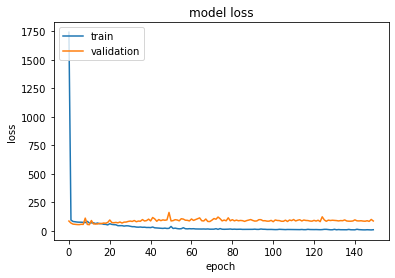

In [20]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [23]:
output=NN_model.predict(X_test)

In [24]:
print(output)

[[ 78.61137 ]
 [ 98.95211 ]
 [ 80.05874 ]
 ...
 [ 87.23622 ]
 [118.792274]
 [ 92.76735 ]]
